In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
housing_data = pd.read_csv('california_housing.csv')
housing_data

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price_above_median
0,2.1827,26.0,4.521429,0.921429,305.0,2.178571,40.05,-122.10,0
1,3.0755,32.0,4.623068,0.983353,3868.0,4.599287,32.77,-117.06,0
2,1.8235,40.0,4.701149,1.126437,928.0,3.555556,37.75,-122.16,0
3,1.4625,37.0,4.247845,1.105603,1673.0,3.605603,33.99,-118.28,0
4,1.9063,13.0,3.453125,0.984375,286.0,4.468750,33.97,-118.16,0
...,...,...,...,...,...,...,...,...,...
20629,4.3487,29.0,5.930712,1.026217,1554.0,2.910112,38.65,-121.84,1
20630,5.6790,20.0,6.401274,1.070064,457.0,2.910828,38.56,-122.05,1
20631,1.9327,10.0,5.789474,1.078947,898.0,3.938596,38.57,-121.92,1
20632,3.7500,38.0,5.275229,0.981651,259.0,2.376147,38.72,-121.90,1


In [3]:
# Part 1 - Exploratory Data Analysis (EDA) on Dataset

# Identify shape, size of the raw data (1 point)
print(housing_data.shape)
print(housing_data.size)

(20634, 9)
185706


In [ ]:
# Get information about datatypes. Comment if any of the variables need
# datatype conversion. Check for duplicate rows and treat them. (1 point)
housing_data.info()

print(f"# of duplicates: {housing_data.duplicated().sum()}")
housing_data.drop_duplicates(inplace=True)

# Based on the description of the dataset from Scikit-Learn's tutorial,
# https://inria.github.io/scikit-learn-mooc/python_scripts/datasets_california_housing.html,
# the values for each column fall into these data types:
# 1. MedInc - float
# 2. HouseAge - float
# 3. AveRooms - float
# 4. AveBedrms - float
# 5. Population - float
# 6. AveOccup - float
# 7. Latitude - float
# 8. Longitude - float
# 10. price_above_median - binary (int)

# It seems that there are no duplicate rows that needed to be removed, and
# that all of the feature and target variables have the required datatype
# for later model training, so no further preprocessing is needed.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20634 entries, 0 to 20633
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   MedInc              20634 non-null  float64
 1   HouseAge            20634 non-null  float64
 2   AveRooms            20634 non-null  float64
 3   AveBedrms           20634 non-null  float64
 4   Population          20634 non-null  float64
 5   AveOccup            20634 non-null  float64
 6   Latitude            20634 non-null  float64
 7   Longitude           20634 non-null  float64
 8   price_above_median  20634 non-null  int64  
dtypes: float64(8), int64(1)
memory usage: 1.4 MB
# of duplicates: 0


In [ ]:
# Get the statistical information (mean, median, etc.) for all variables and
# derive meaniful insights from it. Comment if you see any anomalies in the
# data. (1 point)
housing_data.describe()

# For each of the columns, the count of rows is 20,634. The average median
# income for a block of houses is approximately $38,707.95. The average
# house age is approximately 28.63 years. The average number of rooms per
# household is approximately 5.43, and the average number of bedrooms per
# household is approximately 1.09. The average population in a block of
# houses is approximately 1,425.39. The average number of people per household
# is approximately 3.07. The average latitude and longitude of a block of
# houses is approximately 35.63 and -119.65, respectively.
# 
# From the statistics, we can see that all of the features have very high
# standard deviations, indicating that there is a lot of variance in the data.
# Some columns, like the average number of people per household, have a
# standard deviation higher than the mean, which indicates that there might
# be many outliers in the data.
# 
# Additionally, the maximum values for some columns are extremely high, such
# as the maximum value for average number of people per household, which is
# 1243.3, the maximum value for Population, which is 35,682, and the maximum
# value for the average number of rooms per household, which is 141.9. These
# values are ridiculously high for the data they represent, representing
# major anomalies in the data.

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price_above_median
count,20634.000000,20634.000000,20634.000000,20634.000000,20634.000000,20634.000000,20634.000000,20634.000000,20634.000000
mean,3.870795,28.640399,5.429171,1.096628,1425.398081,3.070449,35.631722,-119.569594,0.500000
std,1.899796,12.584629,2.474393,0.473929,1132.137403,10.387501,2.135738,2.003457,0.500012
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.000000
25%,2.563925,18.000000,4.440930,1.006067,787.000000,2.429649,33.930000,-121.800000,0.000000
50%,3.534950,29.000000,5.229190,1.048780,1166.000000,2.817937,34.260000,-118.490000,0.500000
75%,4.743550,37.000000,6.052381,1.099499,1725.000000,3.282249,37.710000,-118.010000,1.000000
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,1.000000


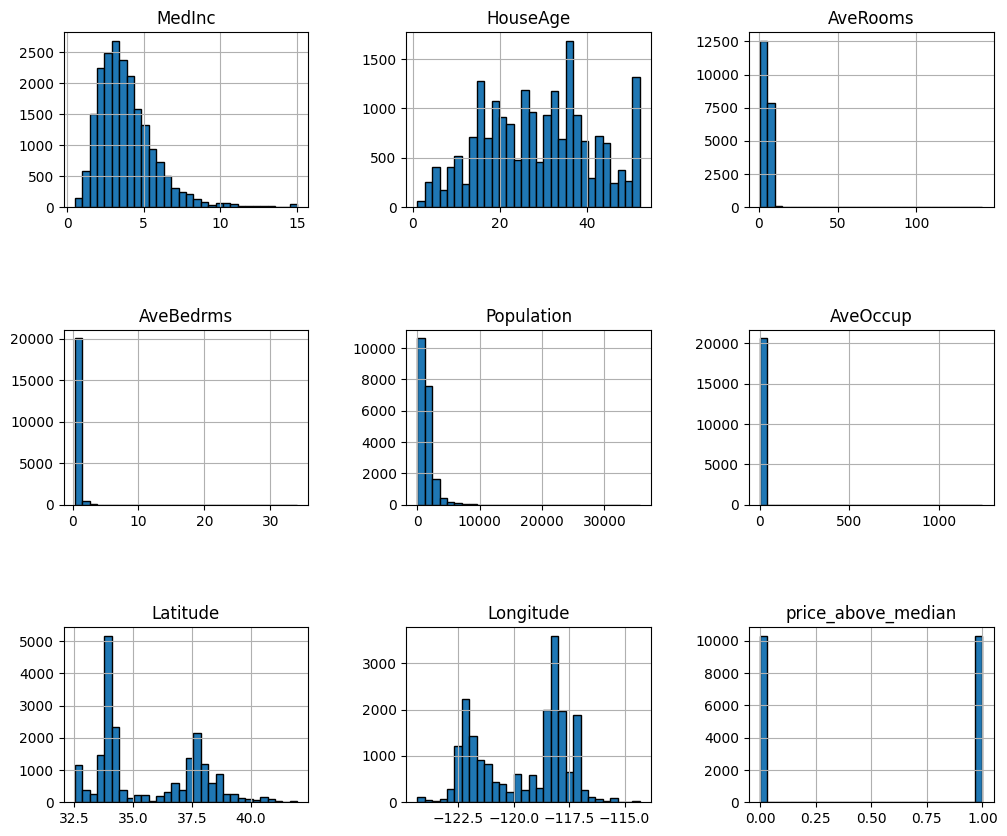

In [ ]:
# Visualize the dataset through different univariate analysis and comment
# on your observations. (2 points)
housing_data.hist(figsize=(12, 10), bins=30, edgecolor="black")
plt.subplots_adjust(hspace=0.7, wspace=0.4)
plt.show()

# From the histogram for the median income, we can see that the data is
# right-skewed, with most of the data points falling between $0 and $50,000.
# This means that the salary of people somewhat normally distributed, with a
# few outliers getting a high salary. The histogram for the house age shows
# that the data is essentially uniformly distributed. For the average rooms,
# average bedrooms, average occupancy, and population, the range of the data
# is very large, with unnoticeable bins for the largest values. This means
# that there are a few very high values for these features, and which aligns
# with the statistics we saw earlier, in which the 75th percentile of the
# columns was 10-15 times lower than the maximum value. Finally, the target
# variable, price_above_median, is a binary variable, with approximately
# 50% of the data points being 0 and 50% being 1. This means that the
# dataset is balanced, and we can use it to train a binary classification
# model without worrying about class imbalance.

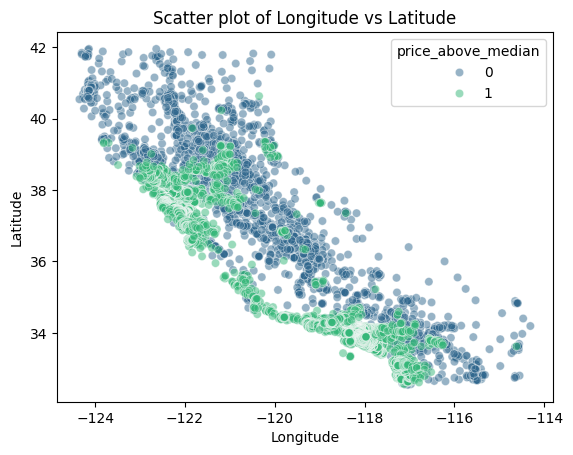

In [ ]:
# The intuition behind including the latitude and longitude columns in
# the dataset may be that the combination of these features that provide
# geographical information could help us decide if there are specific locations
# that are more likely to have a higher median house price. To visualize the
# coordinate information more clearly, we can make a scatter plot where the x
# axis is the longitude and the y axis is the latitude, and the circle color
# is determined by the target variable, price_above_median.
sns.scatterplot(
    data=housing_data,
    x='Longitude',
    y='Latitude',
    hue='price_above_median',
    alpha=0.5,
    palette='viridis'
)
plt.title('Scatter plot of Longitude vs Latitude')
plt.show()

# What's interesting to note is that the data coordinates seem to form a
# shape that resembles the state of California, which is where the data
# was collected from. The scatter plot also shows that the higher-valued
# houses, the ones with a price above the median, are located in the coastal
# areas of California, where major cities like San Francisco and Los Angeles
# are located.